*03200435 - Dang Tran Gia Bao*

# Data set: Wine Quality Dataset

- Documentation: http://archive.ics.uci.edu/ml/datasets/Wine+Quality
- Download: http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
- Description: The Wine Quality Dataset is used for predicting the quality of white wines score between 0 and 10 given chemical measures of each.

In [23]:
filename = "winequality-white.csv"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
wine = pd.read_csv(filename, skiprows = 0, sep= ";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Feature values, data size

There are 4,898 observations with 11 input variables ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol') and one output variable 'quality'.

In [24]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Before applying any learning model we check for null values. There is no null value

In [25]:
wine.isnull().values.any()

False

We adopt all 11 input values as feature values X and set y as output values.

In [26]:
X = wine.iloc[:,0:11]
y = wine["quality"]

4000 records will be used for training and the rest 898 records will be saved for testing.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 4000)
X_test.shape

(898, 11)

# Training model

Random Forest will be used. Results in y_pred should be rounded to be the same format (integer) to the ones in y_test. Mean squared error is 0.41

In [28]:
from sklearn.ensemble import RandomForestRegressor
all_features= X_train.shape[1]
regr_bagging= RandomForestRegressor(max_features=all_features)
regr_bagging.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
y_pred= regr_bagging.predict(X_test)
y_pred = list(map(int, np.round(y_pred))) #Rounding results
mean_squared_error(y_test, y_pred)

0.4354120267260579

To show label of confusing matrix we  have to know max and min of results. The results range from 3 to 9. 

In [29]:
low = min(min(y_pred), min(y_test))
high = max(max(y_pred), max(y_test))
print(low, high)

3 9


The accuracy is 69%.

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index = [i for i in range(low, high + 1)], columns = [i for i in range(low, high + 1)])
print(cm)
print("\nAccuracy: ", accuracy_score(y_test,y_pred)*100)

   3   4    5    6   7   8  9
3  0   0    0    0   0   0  0
4  0   4    0    0   0   0  0
5  2  18  182   49   1   0  0
6  2   7   79  339  64  14  0
7  0   1    4   24  85  14  1
8  0   0    0    0   0   8  0
9  0   0    0    0   0   0  0

Accuracy:  68.8195991091314


# Changing training size

Now we try diffent spliting ratios and repeat each of them 5 times to see if accuracy is improved. Best results can be achieved at train size of about 4500 with accuracy of 70% and MSE of 0.38.

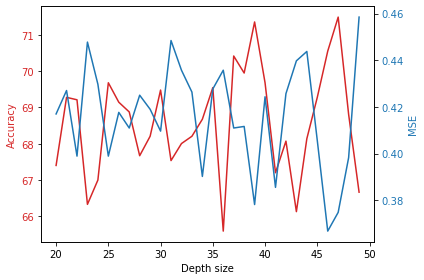

In [37]:
loop = 24
depth = 50
rep = 3
train_size = [2500 + i * 100 for i in range(loop)]
depth_size = [i for i in range(20, depth)]
accuracy = [0 for i in range(20, depth)]
mse = [0 for i in range(20, depth)]
i = 19
for d in range(20, depth):
    for r in range(rep):
        #for i in range(loop):
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 2500 + i * 100)
            all_features= X_train.shape[1]
            regr_bagging= RandomForestRegressor(max_features=all_features, max_depth = d)
            regr_bagging.fit(X_train, y_train)
            y_pred= regr_bagging.predict(X_test)
            y_pred = list(map(int, np.round(y_pred)))
            mse[d-20] += mean_squared_error(y_test, y_pred)
            accuracy[d-20] += accuracy_score(y_test,y_pred)*100
mse = [i / rep for i in mse]
accuracy = [i / rep for i in accuracy]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Depth size')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(depth_size, accuracy, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('MSE', color=color)  # we already handled the x-label with ax1
ax2.plot(depth_size, mse, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Selecting feature values

We will use regression to remove insignificant feature values. We will only adopt significant feature values (p < 0.05)

In [256]:
import statsmodels.api as sm
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          2.707e+04
Date:                Mon, 20 Jul 2020   Prob (F-statistic):                        0.00
Time:                        16:35:42   Log-Likelihood:                         -5575.5
No. Observations:                4898   AIC:                                  1.117e+04
Df Residuals:                    4887   BIC:                                  1.124e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.0506      0.015     -3.356      0.001      -0.080      -0.021
volatile acidity        -1.9585      0.114    -17.196      0.000      -2.182      -1.735
citric acid             -0.0293      0.096     -0.305      0.760      -0.218       0.159
residual sugar           0.0250      0.003      9.642      0.000       0.020       0.030
chlorides               -0.9426      0.543     -1.736      0.083      -2.007       0.122
free sulfur dioxide      0.0048      0.001      5.710      0.000       0.003       0.006
total sulfur dioxide    -0.0009      0.000     -2.352      0.019      -0.002      -0.000
density                  2.0420      0.353      5.780      0.000       1.349       2.735
pH                       0.1684      0.084      2.014      0.044       0.005       0.332
sulphates                0.4165      0.097      4.279      0.000       0.226       0.607
alcohol                  0.3656      0.011     32.880      0.000       0.344       0.387
==============================================================================
Omnibus:                      108.883   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.495
Skew:                           0.064   Prob(JB):                     4.42e-52
Kurtosis:                       4.069   Cond. No.                     7.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'citric acid' and 'chlorides' are removed

In [257]:
X = X.iloc[:, np.where(results.pvalues < 0.05)[0]]
X.head()

,fixed acidity,volatile acidity,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,20.7,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,1.6,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,6.9,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,8.5,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,8.5,47.0,186.0,0.9956,3.19,0.40,9.9


Now we repeat what we did at 4. to see if better result can be achieved. Best results are also at training size 4700, with accuracy of 69% and MSE near 0.40. Thus this approach does not work.

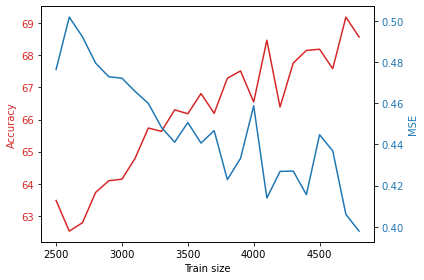

In [267]:
loop = 24
rep = 5
train_size = [2500 + i * 100 for i in range(loop)]
accuracy = [0 for i in range(loop)]
mse = [0 for i in range(loop)]
for r in range(rep):
    for i in range(loop):
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 2500 + i * 100)
        all_features= X_train.shape[1]
        regr_bagging= RandomForestRegressor(max_features=all_features)
        regr_bagging.fit(X_train, y_train)
        y_pred= regr_bagging.predict(X_test)
        y_pred = list(map(int, np.round(y_pred)))
        mse[i] += mean_squared_error(y_test, y_pred)
        accuracy[i] += accuracy_score(y_test,y_pred)*100
mse = [i / rep for i in mse]
accuracy = [i / rep for i in accuracy]

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Train size')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(train_size, accuracy, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('MSE', color=color)  # we already handled the x-label with ax1
ax2.plot(train_size, mse, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Misprediction 

Now moving back to our original dataframe. We already know than train size of 4500 can bring the best result, therefore we will try it. From confusion matrix we can see that most misprediction are in &pm;1 range.

In [268]:
X = wine.iloc[:,0:11]
y = wine["quality"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 4500)
X_test.shape

from sklearn.ensemble import RandomForestRegressor
all_features= X_train.shape[1]
regr_bagging= RandomForestRegressor(max_features=all_features)
regr_bagging.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
y_pred= regr_bagging.predict(X_test)
y_pred = list(map(int, np.round(y_pred))) #Rounding results
print("MSE: ", mean_squared_error(y_test, y_pred))

low = min(min(y_pred), min(y_test))
high = max(max(y_pred), max(y_test))
from sklearn.metrics import confusion_matrix, accuracy_score
cm = pd.DataFrame(confusion_matrix(y_test, y_pred).T, index = [i for i in range(low, high + 1)], columns = [i for i in range(low, high + 1)])
print(cm)
print("\nAccuracy: ", accuracy_score(y_test,y_pred)*100)

MSE:  0.36432160804020103
   3   4   5    6   7  8
3  0   0   0    0   0  0
4  0   2   0    0   0  0
5  1  10  86   25   4  0
6  0   1  29  131  26  2
7  0   0   1   14  57  5
8  0   0   0    0   0  4

Accuracy:  70.35175879396985
